<a href="https://colab.research.google.com/github/adityajoshi0/Google-Play-Store-Data-Analysis/blob/main/Playstore_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data set

In [ ]:
df= pd.read_csv('/content/googleplaystore.csv')

Basic Data Exploration

In [ ]:
# Display  the first few rows
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [ ]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [ ]:
# Summary statistics  of numerical columns
print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


Data Cleaning

In [ ]:
# Check for missing values
print (df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
# Fill missing valuesor drop rows/ columns as necessary
df.dropna(inplace=True)

In [ ]:
# Convert 'Installs' to nuneric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

Summary Data Analysis (EDA)

In [ ]:
#Summary Statistic
print(df.describe())


            Rating      Installs
count  9360.000000  9.360000e+03
mean      4.191838  1.790875e+07
std       0.515263  9.126637e+07
min       1.000000  1.000000e+00
25%       4.000000  1.000000e+04
50%       4.300000  5.000000e+05
75%       4.500000  5.000000e+06
max       5.000000  1.000000e+09


Visualization

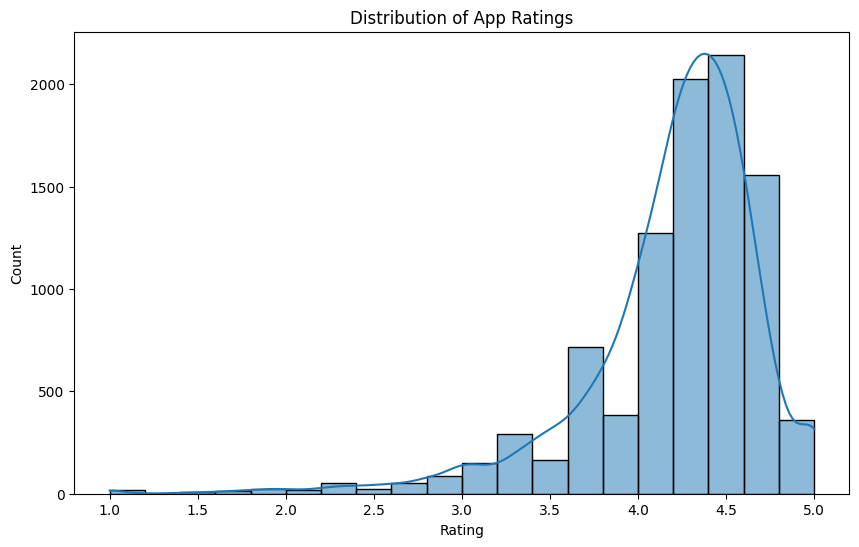

In [ ]:
#Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20 , kde=True)
plt.title('Distribution of App Ratings')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

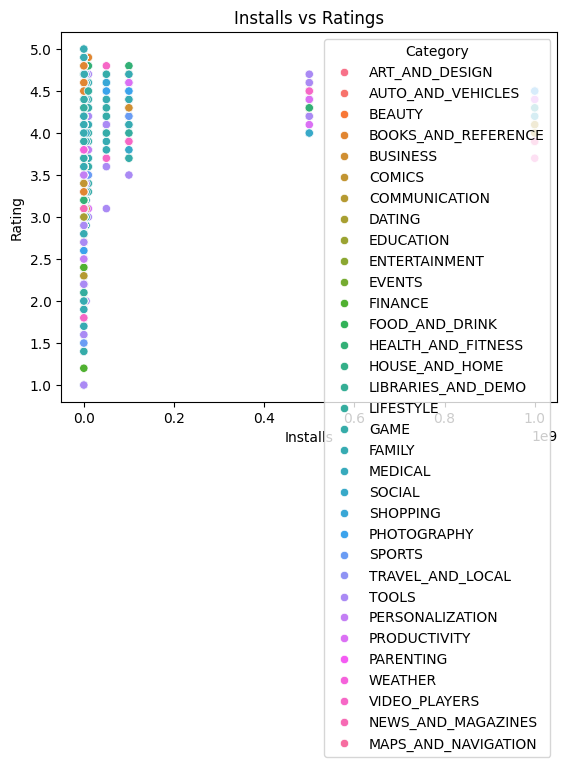

In [ ]:
# Relationship between installs and ratings
sns.scatterplot(data=df, x='Installs', y='Rating', hue='Category')
plt.title('Installs vs Ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

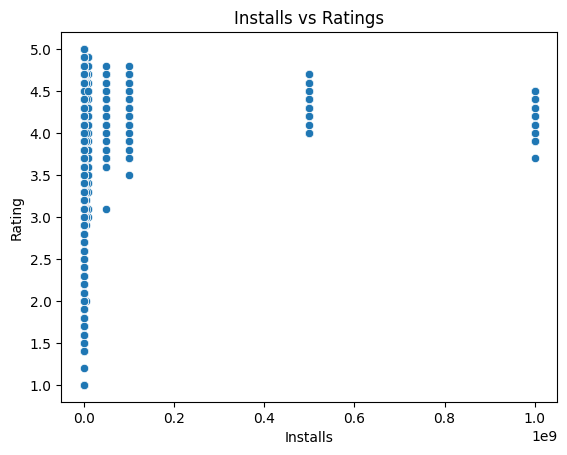

In [ ]:
sns.scatterplot(data=df, x='Installs', y='Rating', )
plt.title('Installs vs Ratings')
plt.show

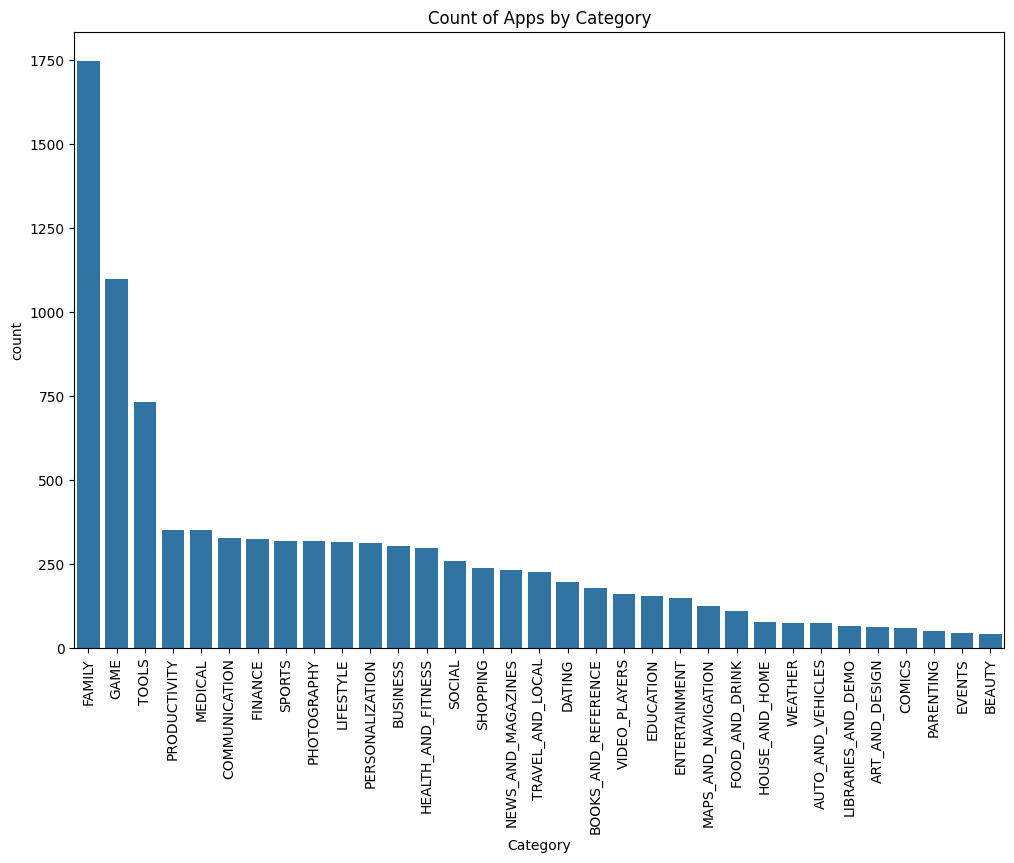

In [ ]:
# Count of apps by Category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xticks(rotation=90)
plt.show()

Analyzing Key metrics

In [ ]:
# Average rating by Category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.377049
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335256
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192383
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.179688
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

In [ ]:
# Most popular apps (by installs)
most_installed_apps = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print(most_installed_apps)

                                           App    Installs
451                                      Gmail  1000000000
3665                                   YouTube  1000000000
382   Messenger – Text and Video Chat for Free  1000000000
386                                   Hangouts  1000000000
391              Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000
411               Google Chrome: Fast & Secure  1000000000
3736                               Google News  1000000000
3765                               Google News  1000000000
865                          Google Play Games  1000000000


In [ ]:
# Top 5 genres
top_genres = df['Genres'].value_counts().head(5)
print(top_genres)

Genres
Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Name: count, dtype: int64


● Sentiment analysis of user reviews.
● Time series analysis of app updates and their impact on ratings.
● Predictive modeling to forecast app ratings based on features.

In [ ]:
# Importing libraries
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Data loading and exploration

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')

In [ ]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [ ]:
df.iloc[10474:10494 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
10478,Sci Fi Sounds,FAMILY,3.2,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up
10479,Free Wi-fi HotspoT,COMMUNICATION,4.1,382,2.3M,"50,000+",Free,0,Everyone,Communication,"July 20, 2018",2.5,4.0 and up
10480,FJ 4x4 Cruiser Offroad Driving,FAMILY,4.1,3543,49M,"500,000+",Free,0,Everyone,Simulation,"January 4, 2017",1.1,2.3 and up
10481,FJ 4x4 Cruiser Snow Driving,FAMILY,4.2,1619,43M,"500,000+",Free,0,Everyone,Simulation,"June 4, 2018",1.3,4.0 and up
10482,Wallpapers Toyota FJ Cruiser,PERSONALIZATION,4.2,78,10M,"10,000+",Free,0,Everyone,Personalization,"June 20, 2016",1.0,2.3.3 and up
10483,New Wallpapers Toyota FJ Cruiser Theme,PERSONALIZATION,NaN,1,16M,100+,Free,0,Teen,Personalization,"February 23, 2018",1.0,4.1 and up


In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4736,WowBox,LIFESTYLE,4.4,101957,8.2M,"5,000,000+",Free,0,Everyone,Lifestyle,"April 23, 2018",2.11.0,4.0.3 and up
10283,Bank FD Interest Calculator,FINANCE,4.5,166,3.5M,"10,000+",Free,0,Everyone,Finance,"January 7, 2018",2.5,4.0.3 and up
7347,boattheory.ch Full 2018,FAMILY,4.7,54,50M,"1,000+",Paid,$19.40,Everyone,Education,"November 18, 2017",3.1.2,4.2 and up
691,SkyLove – Dating and chat,DATING,3.5,69,36M,"5,000+",Free,0,Mature 17+,Dating,"August 4, 2018",1.0.82,4.4 and up
10501,HD Themes Toyota Cruiser 40,PERSONALIZATION,NaN,2,15M,100+,Free,0,Teen,Personalization,"October 2, 2016",1.0,2.3.3 and up
4107,Video Downloader for Facebook,TOOLS,4.6,894435,3.1M,"50,000,000+",Free,0,Teen,Tools,"July 1, 2018",2.2.8,4.0 and up
10082,EY TaxChat,FINANCE,1.2,44,27M,"1,000+",Free,0,Everyone,Finance,"April 9, 2018",3.24.0,6.0 and up
10286,Formula DRIFT,SPORTS,4.6,169,19M,"10,000+",Free,0,Everyone,Sports,"July 27, 2018",2.0.855.33,4.0.3 and up
442,CIA - Caller ID & Call Blocker,COMMUNICATION,4.0,60308,Varies with device,"5,000,000+",Free,0,Everyone,Communication,"June 22, 2018",Varies with device,Varies with device
1054,Nedbank Money,FINANCE,4.2,6076,32M,"500,000+",Free,0,Everyone,Finance,"July 28, 2018",4.1.1-0-prod,4.2 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Set the option maximum of rows and column

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

Checking the shape of the columns

In [ ]:
print(f'The number of Rows are "{df.shape[0]}" and the number of columns are "{df.shape[1]}"')

The number of Rows are "10841" and the number of columns are "13"


In [ ]:
print(f'The name of the columns are "{df.columns}"')

The name of the columns are "Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')"


Checking the info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#Removing this row from the data because this is causing some problem 10472
df.drop(10472, axis=0 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


Taking size column and make it numeric

In [ ]:
df['Size'].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
15M,184
17M,160
19M,154
26M,149


In [ ]:
df['Size'].isnull().sum()

0

Checking the number if value in three diffrent categories in size

In [ ]:
print(" Number of M in size Column",df['Size'].loc [df['Size'].str.contains('M')].value_counts().sum())

 Number of M in size Column 8829


In [ ]:
print(" Number of k in size Column",df['Size'].loc [df['Size'].str.contains('k')].value_counts().sum())

 Number of k in size Column 316


In [ ]:
print(" Number of Varies with device in size Column",df['Size'].loc [df['Size'].str.contains('Varies with device')].value_counts().sum())

 Number of Varies with device in size Column 1695


Convert the whole size of the column into bytes

In [ ]:
# define a funtion
def convert_into_bytes(column_name):
  if isinstance(column_name, str):
    if 'k' in column_name:
      return float(column_name.replace('k',''))*1024
    elif 'M' in column_name:
      return float(column_name.replace('M',''))*1024*1024
    elif 'Varies with device' in column_name:
        return np.nan

    return column_name

In [ ]:
df['Size'] = df['Size'].apply(convert_into_bytes)

In [ ]:
df['Size']

,Size
0,19922944.0
1,14680064.0
2,9122611.2
3,26214400.0
4,2936012.8
5,5872025.6
6,19922944.0
7,30408704.0
8,34603008.0
9,3250585.6


In [ ]:
## Define a function to deal with installs column

def installs(install):
  if isinstance(install, str):
    if '+' in install:
      return install.replace("+", "")
      return int(install)



In [ ]:
df['Installs'] = df['Installs'].apply(installs)

In [ ]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x)
else x)

In [ ]:
df['Installs'] = df['Installs'].astype('str')

In [ ]:
df['Installs'].value_counts()

,count
Installs,
1000000,1579
10000000,1252
100000,1169
10000,1054
1000,907
5000000,752
100,719
500000,539
50000,479


In [ ]:
print(df['Installs'].dtype)



object


In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [ ]:
df['Installs'].fillna(0, inplace=True)  # Replace NaN with 0
# or
df.dropna(subset=['Installs'], inplace=True)  # Drop rows with NaN

In [ ]:
# making a new column called 'Installs_category' which will have the category of theinstalls
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'VeryHigh', 'Top Notch']


In [ ]:
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [ ]:
df['Installs_category'].value_counts()

,count
Installs_category,
Low,2161
High,2118
VeryHigh,2004
More than moderate,1648
Moderate,1531
Top Notch,828
Very low,535
no,15


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,VeryHigh
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,More than moderate


Taking Price column


In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
def adjust_price(price):
  if isinstance(price, str):
    if '$' in price:
      return float(price.replace('$', ''))

      return price

In [ ]:
df['Price']= df['Price'].apply(adjust_price)

In [ ]:
df['Price'].unique()

array([   nan,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df['Price'].dtype

dtype('float64')

In [ ]:
df['Price']= df['Price'].astype('float')

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,800.000000
mean,4.191757,4.441529e+05,2.256133e+07,1.546434e+07,13.920838
std,0.515219,2.927761e+06,2.368637e+07,8.502936e+07,57.195358
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.990000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,1.490000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,2.990000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,4.990000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,NaN,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,NaN,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,NaN,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,VeryHigh
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,NaN,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,NaN,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,More than moderate


Missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
Price,10040
Size,1695
Rating,1474
Current Ver,8
Android Ver,2
Type,1
App,0
Category,0
Reviews,0
Installs,0


<Axes: >

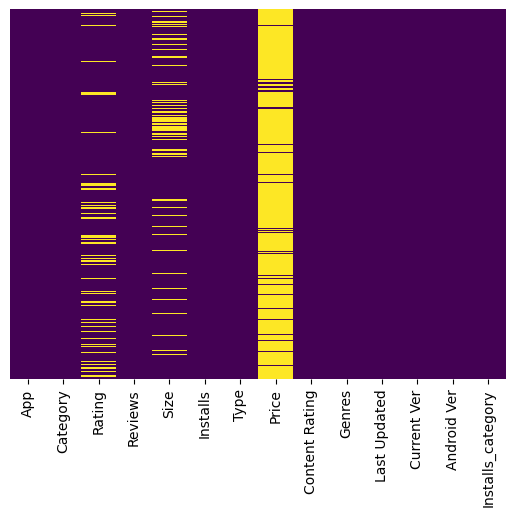

In [ ]:
### Plot missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Missing Values Percentage in Each Column')

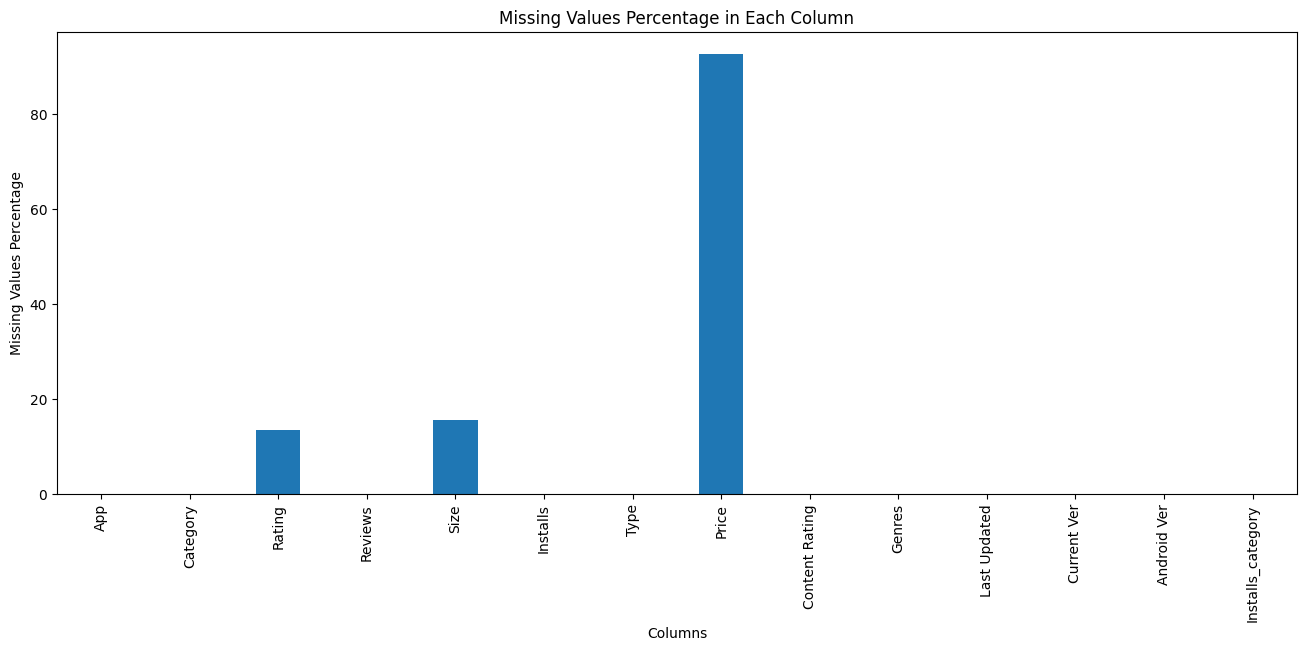

In [ ]:
## make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Each Column')

Text(0.5, 1.0, 'Percentage of Missing Values  in Each Column without Rating')

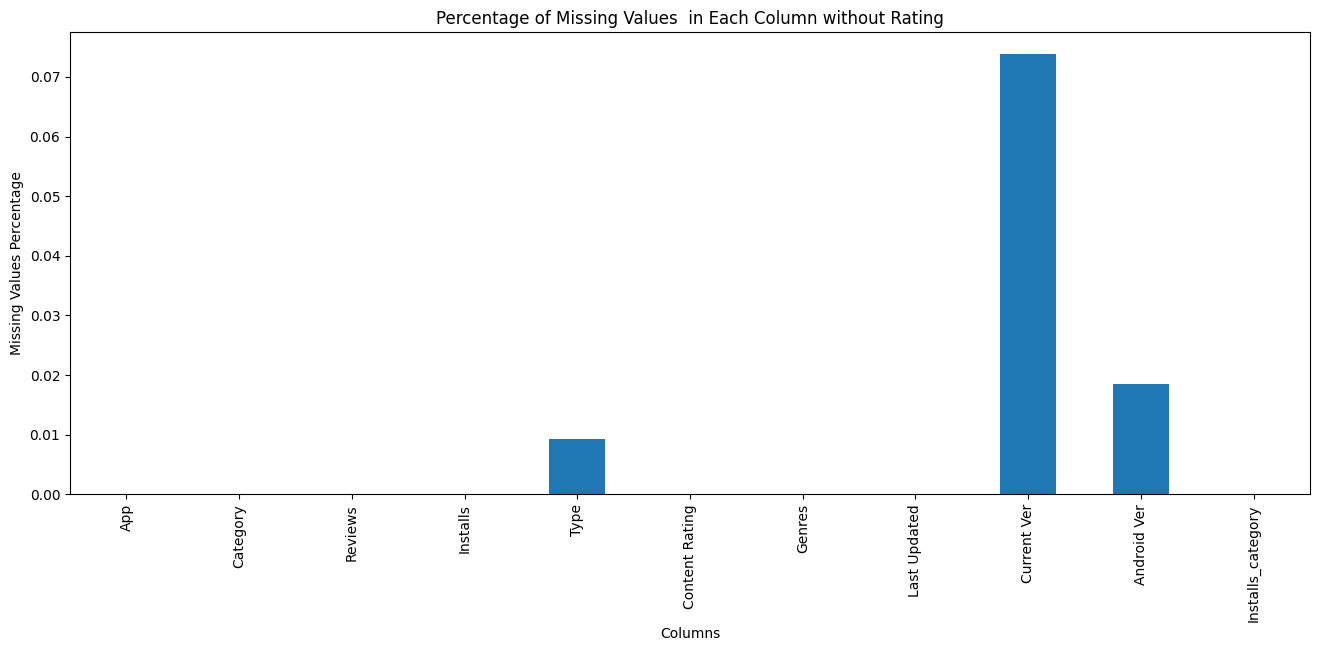

In [ ]:
plt.figure(figsize=(16, 6))
#making figure size
missing_percentage[missing_percentage < 1].plot(kind='bar')
# plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis lables
plt.ylabel('Missing Values Percentage') # add the lables for y-axis
plt.title('Percentage of Missing Values  in Each Column without Rating')
#add the title for the plot

Dealing with missingvalues

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_category'],
      dtype='object')

In [ ]:
numeric_cols = [i for i in df.columns if df[i].dtype != 'object']
# making a list of numeric value

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
numeric_cols

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [ ]:
corr = df[numeric_cols].corr()

In [ ]:
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083737,0.051355,-0.112951
Reviews,0.068141,1.000000,0.238214,0.643122,-0.013860
Size,0.083737,0.238214,1.000000,0.164787,-0.060912
Installs,0.051355,0.643122,0.164787,1.000000,-0.021633
Price,-0.112951,-0.013860,-0.060912,-0.021633,1.000000


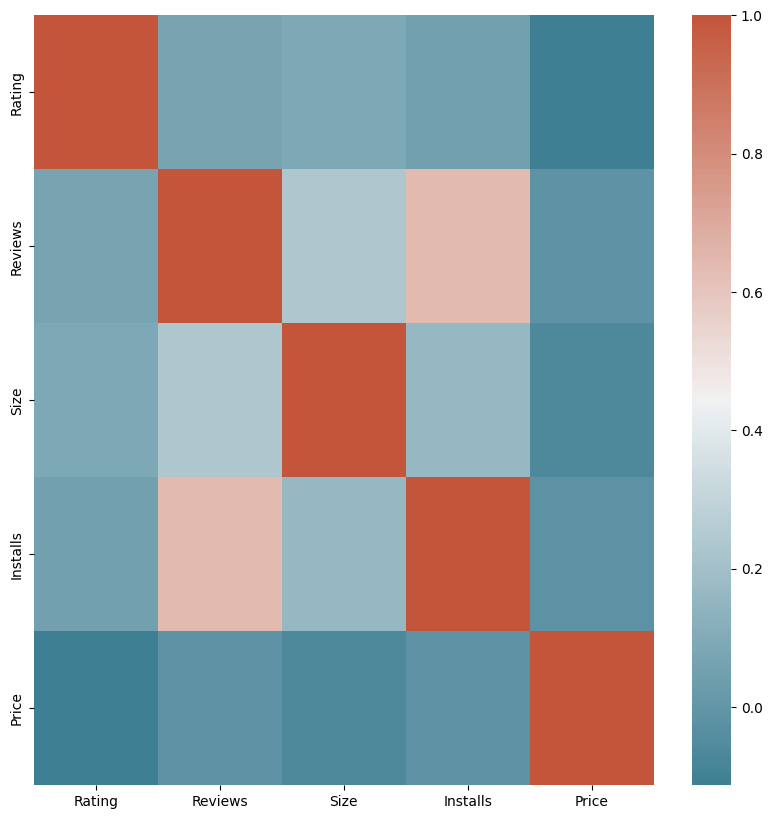

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Calculating pearson correlation coefficient using scipy.



In [ ]:
pip install scipy

In [ ]:
from scipy import stats

In [ ]:
# remove rows containing NaN or Infinite values
df_clean = df.dropna()

In [ ]:
# calculating pearsons 'R between Rating and installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:4f}")

Pearson's R between Reviews and Installs: 0.788659


In [ ]:
#remove the rows having null values
df.dropna(subset=['Current Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [ ]:
# length after removing null values
print(f'The length after removing null values is {len(df)}')

The length after removing null values is 10831


In [ ]:
# use groupby function to find the trend of rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1279.0,4.171149,0.825307,1.0,3.8,4.4,4.8,5.0
Moderate,1441.0,4.035739,0.604342,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
VeryHigh,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [ ]:
df['Rating'].isnull().sum()

1469

In [ ]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

,count
Installs_category,
Low,880
Very low,453
Moderate,88
More than moderate,31
no,14
High,3
VeryHigh,0
Top Notch,0


Text(7, 3.5, 'Null values: 0')

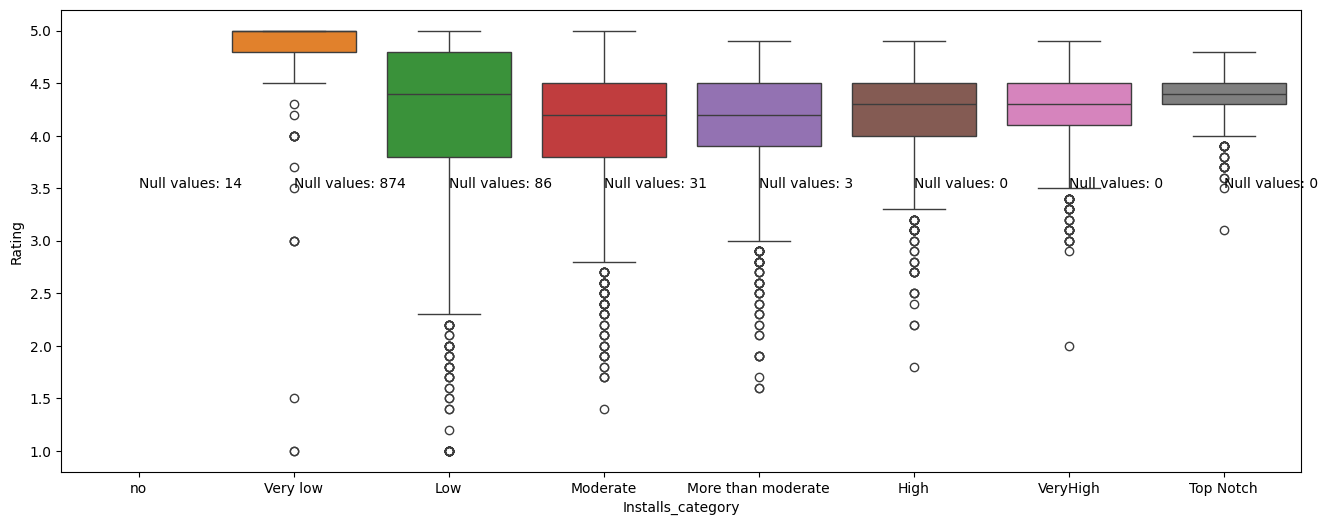

In [ ]:
# plot the boxplot if rating in each Installs_category
plt.figure(figsize=(16, 6)) # making figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df)
#plot boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [ ]:
def fill_missing_rating(df, category, fill_value):
  # Filter the DataFrame for rows where the category matches and rating is  missing
  filtered_df = df[(df['Installs_category']==category) & df['Rating'].isnull()]
  # fill the missing  values with the specified value
  df.loc[filtered_df.index, 'Rating'] = fill_value
  return df


In [ ]:
df = fill_missing_rating(df, 'Very low', 4.170970)

In [ ]:
df = fill_missing_rating(df, 'Very  Low', 4.637037)
df = fill_missing_rating(df, 'Moderate', 4.035417)
df = fill_missing_rating(df, 'More than moderate', 4.093255)
df = fill_missing_rating(df, 'High', 4.207525)

In [ ]:
df = fill_missing_rating(df, 'no', 0)

In [ ]:
# which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

,count
Installs_category,
Low,880
no,0
Very low,0
Moderate,0
More than moderate,0
High,0
VeryHigh,0
Top Notch,0


In [ ]:
df['Rating'].isnull().sum()

880

<Axes: xlabel='Installs_category', ylabel='Reviews'>

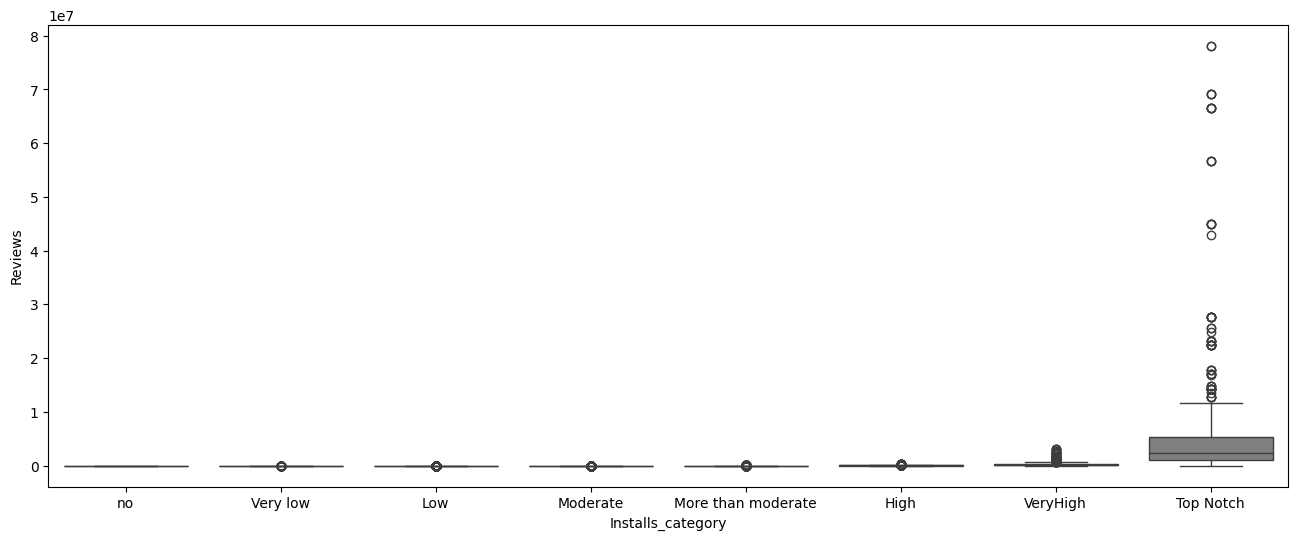

In [ ]:
# plot  the same plot for Reviews column as well
plt.figure(figsize=(16, 6)) # making figure size
sns.boxplot(x='Installs_category', y='Reviews', hue='Installs_category', data=df)
#plot boxplot

<Axes: xlabel='Installs_category', ylabel='Reviews'>

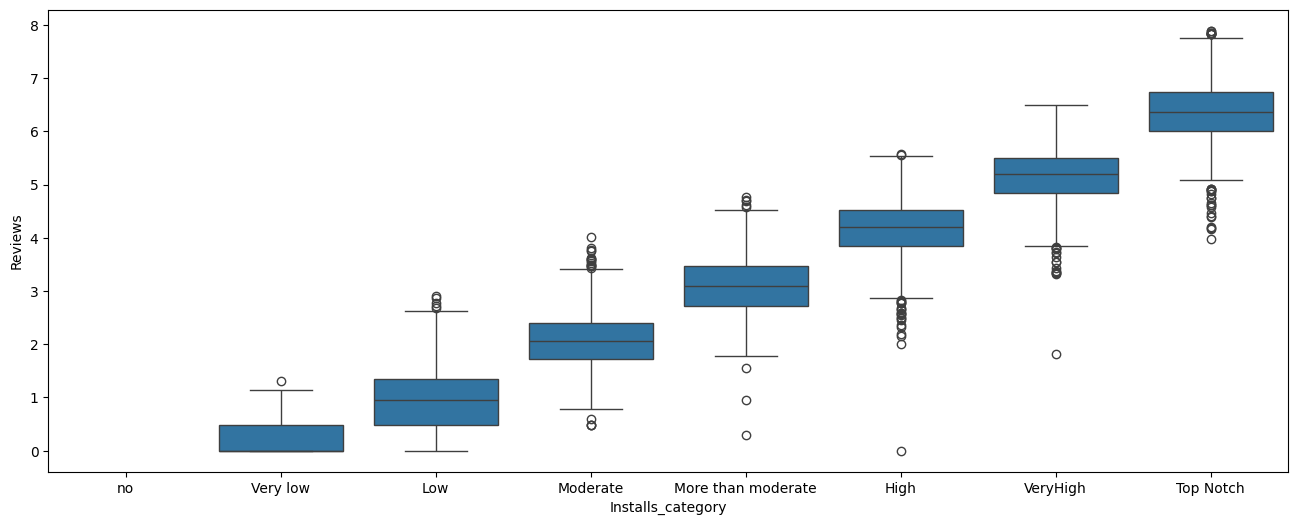

In [ ]:
# plot the same plots for Reviews column a well
plt.figure(figsize=(16, 6)) # making figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df)
#plot boxplot


<Axes: xlabel='Reviews', ylabel='Rating'>

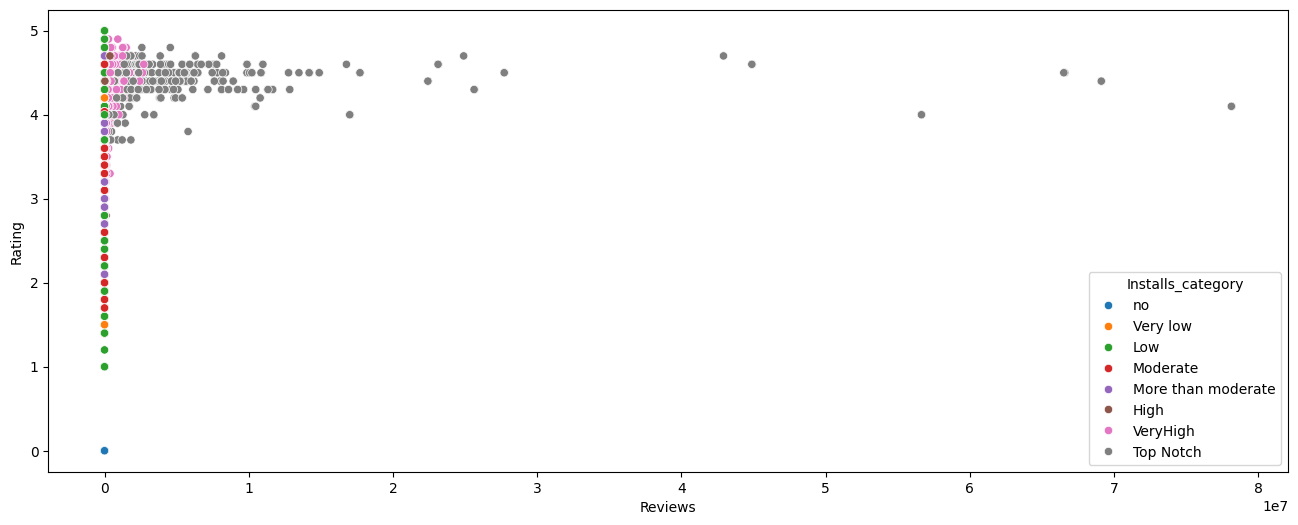

In [ ]:
# Draw a sactter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Rating', hue='Installs_category', data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

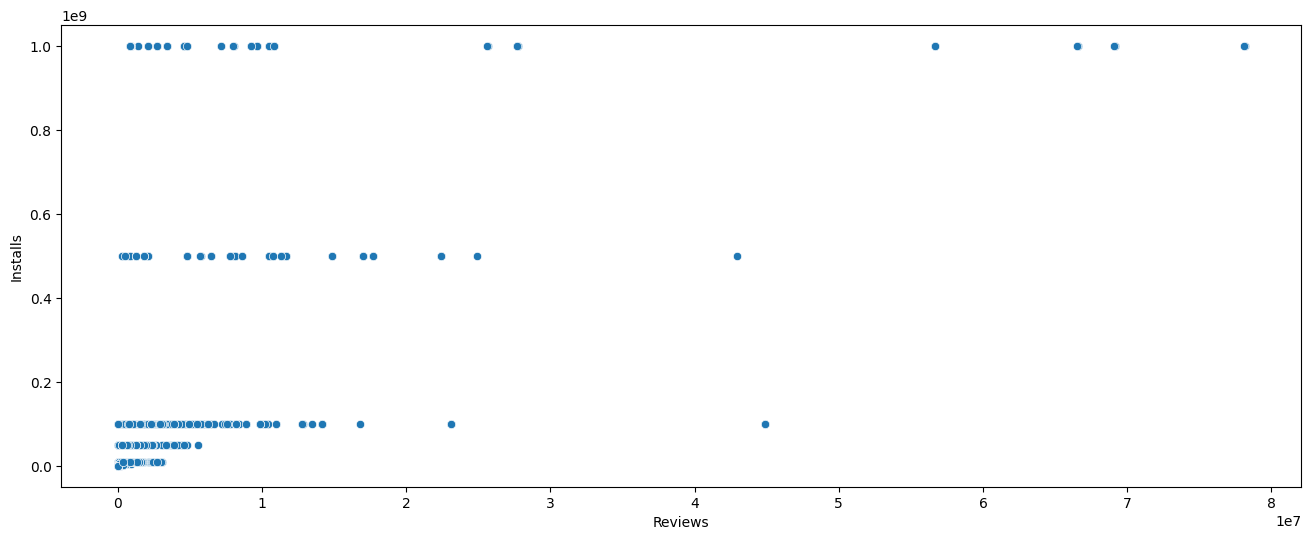

In [ ]:
# plot  reviews and Installs in scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)


<Axes: xlabel='Reviews', ylabel='Installs'>

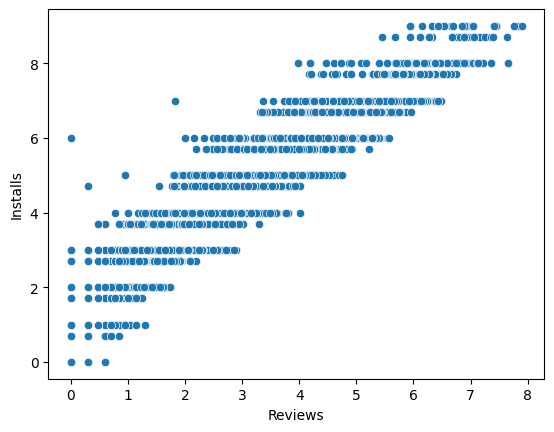

In [ ]:
# didn't see any trend and the issue is we need to normalize the data before plotting it.(log transformation)
# plot reviews and installs in a scatter plot
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)

<Figure size 1600x600 with 0 Axes>

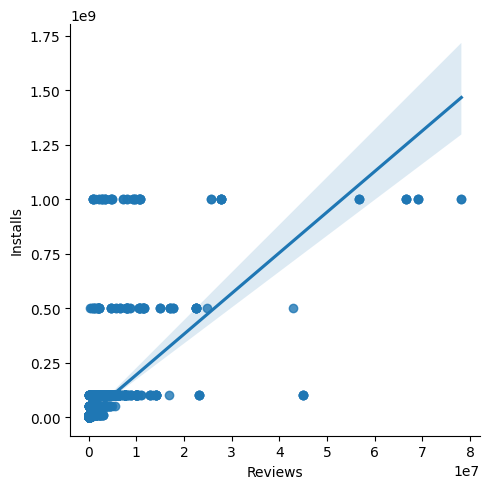

In [ ]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6))
sns.lmplot(x='Reviews', y='Installs', data=df)

Duplicates

In [ ]:
# finf duplicates if any
df.duplicated().sum()

483

In [ ]:
# let's check for number of dulicates
for col in df.columns:
  print(f'The number of duplicates in {col} is {df[col].duplicated().sum()}')

The number of duplicates in App is 1181
The number of duplicates in Category is 10798
The number of duplicates in Rating is 10787
The number of duplicates in Reviews is 4832
The number of duplicates in Size is 10375
The number of duplicates in Installs is 10811
The number of duplicates in Type is 10829
The number of duplicates in Price is 10739
The number of duplicates in Content Rating is 10825
The number of duplicates in Genres is 10712
The number of duplicates in Last Updated is 9455
The number of duplicates in Current Ver is 8000
The number of duplicates in Android Ver is 10797
The number of duplicates in Installs_category is 10823


In [ ]:
# printing the number of duplicates in df
print(f"Number of duplicates in df is {df.duplicated().sum()}")

Number of duplicates in df is 483


In [ ]:
# removing the duplicates
df.drop_duplicates(inplace=True)

Insights from Data

In [ ]:
# which category has the highest number of apps
df['Category'].value_counts().head(10)# shows top 10 category

,count
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


In [ ]:
# highest number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

,Installs
Category,
GAME,3.154402e+10
COMMUNICATION,2.415228e+10
SOCIAL,1.251387e+10
PRODUCTIVITY,1.246309e+10
TOOLS,1.145227e+10
FAMILY,1.004163e+10
PHOTOGRAPHY,9.721248e+09
TRAVEL_AND_LOCAL,6.361887e+09
VIDEO_PLAYERS,6.222003e+09


In [ ]:
# higest number of reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

,Reviews
Category,
GAME,1415536650
COMMUNICATION,601273552
SOCIAL,533576829
FAMILY,396771746
TOOLS,273181033
PHOTOGRAPHY,204297410
VIDEO_PLAYERS,110380188
PRODUCTIVITY,102554498
SHOPPING,94931162


In [ ]:
#  which category has highest rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

,Rating
Category,
EVENTS,4.387153
EDUCATION,4.373794
BOOKS_AND_REFERENCE,4.323465
PERSONALIZATION,4.306996
ART_AND_DESIGN,4.298885
GAME,4.279969
PARENTING,4.259759
HEALTH_AND_FITNESS,4.256912
BEAUTY,4.251792


<Axes: xlabel='Rating', ylabel='Density'>

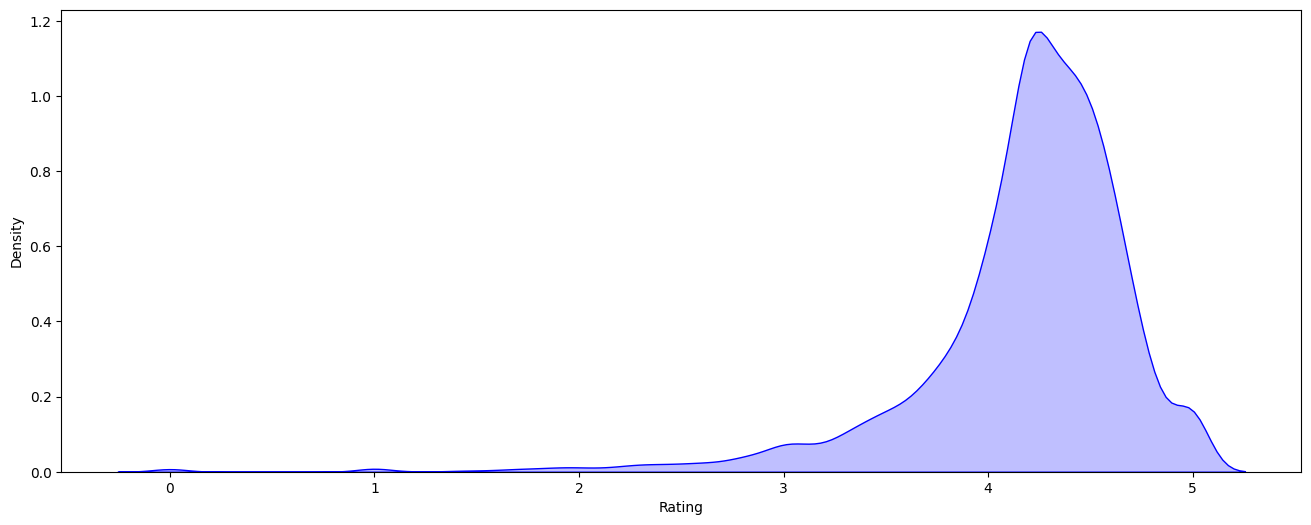

In [ ]:
# plot the rating distribution
plt.figure(figsize=(16, 6))
sns.kdeplot(df['Rating'],color="blue", shade=True)